In [1]:
import pandas as pd
import numpy as np
import os
import regex as re
import matplotlib.pyplot as plt

In [2]:
ad_df = pd.read_csv(os.path.join('EEG_human', 'ad_eeg_all.csv'))
ad_df = ad_df[ad_df['time'] <= 20]
control_df = pd.read_csv(os.path.join('EEG_human', 'control_eeg_all.csv'))
control_df = control_df[control_df['time'] <= 20]
ftd_df = pd.read_csv(os.path.join('EEG_human', 'ftd_eeg_all.csv'))
ftd_df = ftd_df[ftd_df['time'] <= 20]


Preprocessing has already been done:

Only the derivatives folder, where the preprocessed data is kept, is covered by this section. The following is the EEG signals’ preprocessing pipeline. 

* The signals were **re-referenced to the average value of A1-A2** (reference electrodes placed on mastoids) after applying a **Butterworth band-pass filter with a frequency range of 0.5 to 45 Hz**. 
* The signals were then subjected to the **ASR routine, an automatic artifact reject technique that can eliminate persistent or large-amplitude artifacts, which removed bad data periods that exceeded the maximum acceptable 0.5 s window standard deviation of 17 (which is regarded as a conservative window)**. 
* **The ICA method (RunICA algorithm) was then used to convert the 19 EEG signals to 19 ICA components [19]**. ICA components categorized as “eye artifacts” or “jaw artifacts” by the EEGLAB platform’s automatic classification method “ICLabel” were automatically excluded. 

It should be mentioned that, even though the recording was done in a resting state with the eyes closed, eye movement artifacts were still identified in certain EEG recordings. Figure 2 represents a snapshot of the same signal in raw form, and in preprocessed form. It can be observed that severe high frequency artifacts have been removed and baseline correction has been applied.

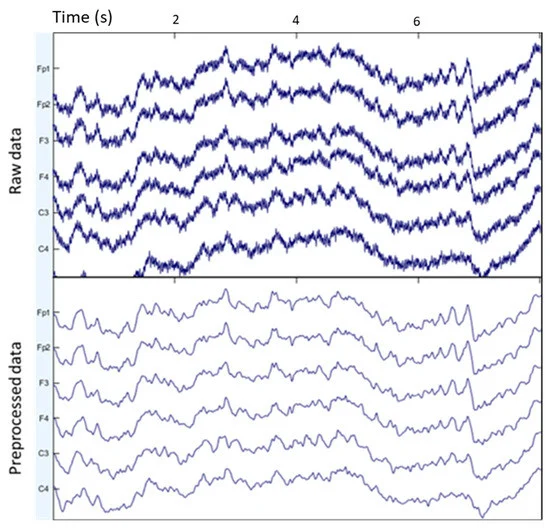

[Miltiadous, A., Tzimourta, K. D., Afrantou, T., Ioannidis, P., Grigoriadis, N., Tsalikakis, D. G., Angelidis, P., Tsipouras, M. G., Glavas, E., Giannakeas, N., & Tzallas, A. T. (2023). A Dataset of Scalp EEG Recordings of Alzheimer’s Disease, Frontotemporal Dementia and Healthy Subjects from Routine EEG. Data, 8(6), 95. https://doi.org/10.3390/data8060095](https://www.mdpi.com/2306-5729/8/6/95)

In [3]:
# Make nx3 plot
def vis_class_channel(df=control_df, group='control'):
    channels = ['Fp1', 'Fp2', 'F3']
    temp_fig, temp_ax = plt.subplots(len(list(filter(lambda x: 'Fp1' in x, df.columns))), len(channels), figsize=(30, 60), sharex=True, sharey=True)
    for i in range(len(channels)):
        fp_cols = list(filter(lambda x: channels[i] in x, df.columns))
        temp_df = df[['time'] + fp_cols].dropna()
        for j in range(len(fp_cols)):
            sub = fp_cols[j]
            temp_ax[j][i].plot(temp_df['time'], temp_df[sub])
            temp_ax[j][i].set_xlabel('Time (s)')
            temp_ax[j][i].set_ylabel('Signal (µV)')
            temp_ax[j][i].set_title(sub)
    temp_fig.suptitle(f'{channels[i]} channel for {group} group')    
    temp_fig.tight_layout(rect=[0, 0.03, 1, 0.98])


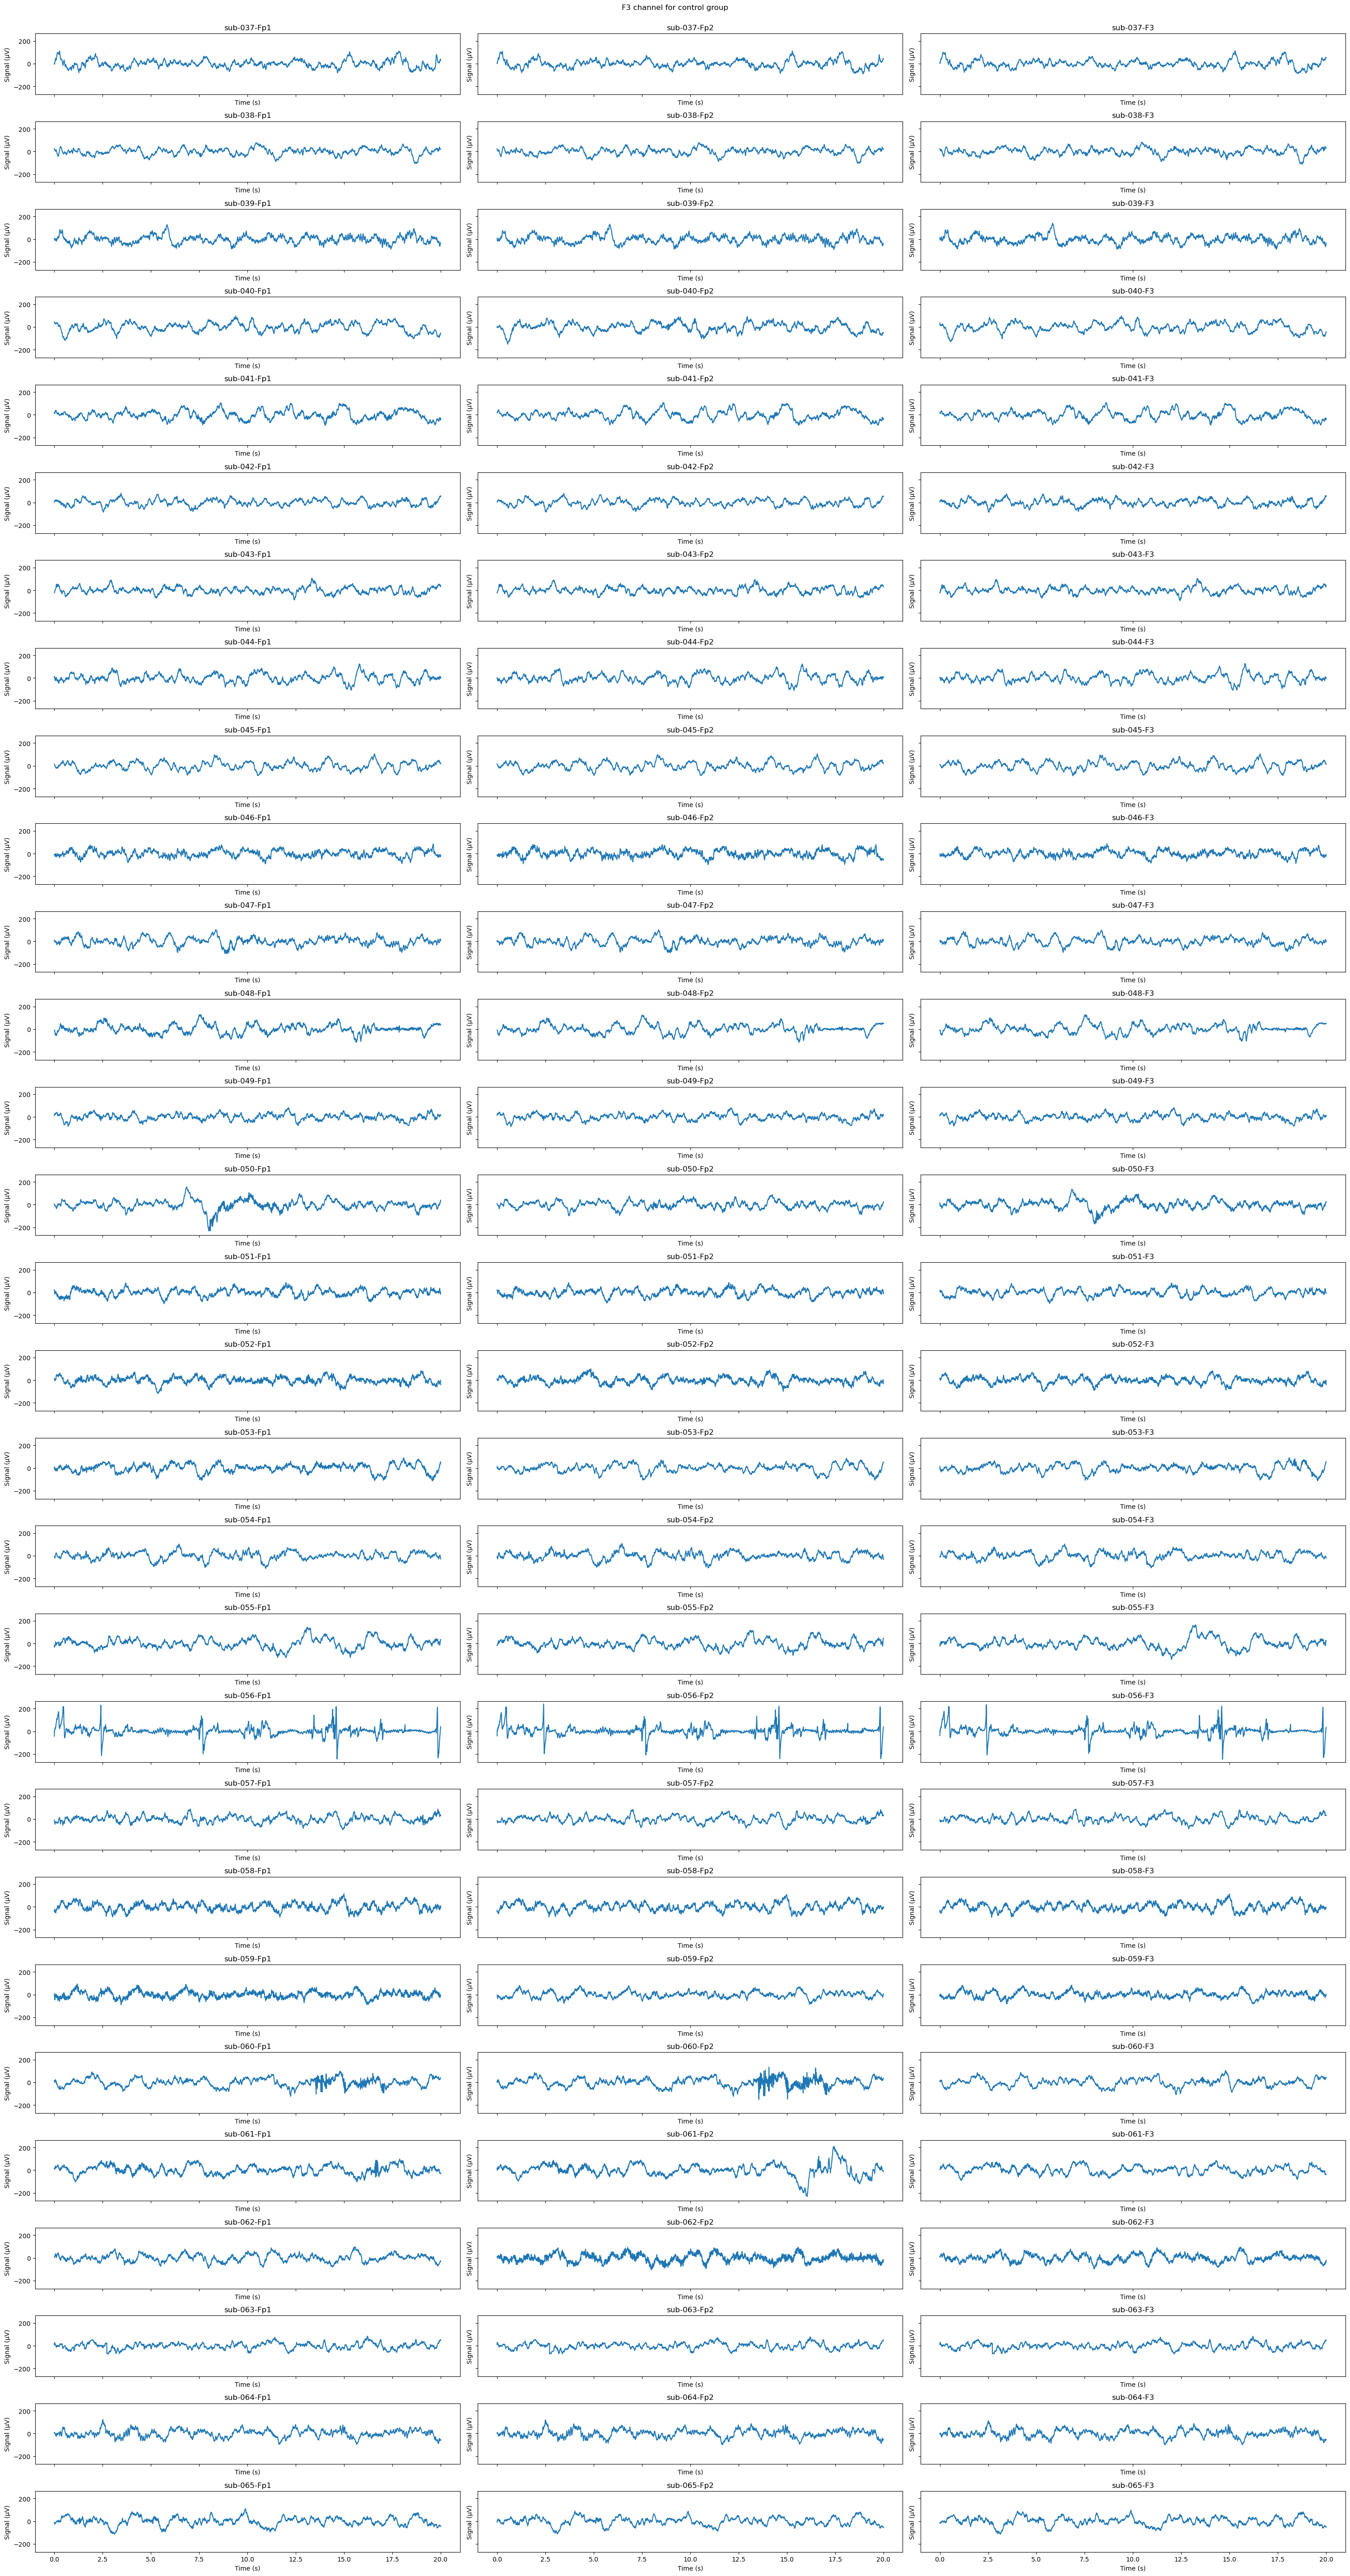

In [4]:
vis_class_channel(control_df, 'control')

In [5]:
# Removing samples with large outliers
to_remove_control = ['sub-050', 'sub-056', 'sub-060', 'sub-061']

control_df_filtered = control_df[['time'] + list(filter(lambda x: re.findall(r'sub-\d{3}', x)[0] not in to_remove_control, control_df.columns[1:]))]
control_df_filtered.to_csv(os.path.join('EEG_human', 'control_eeg_20.csv'), index=True)


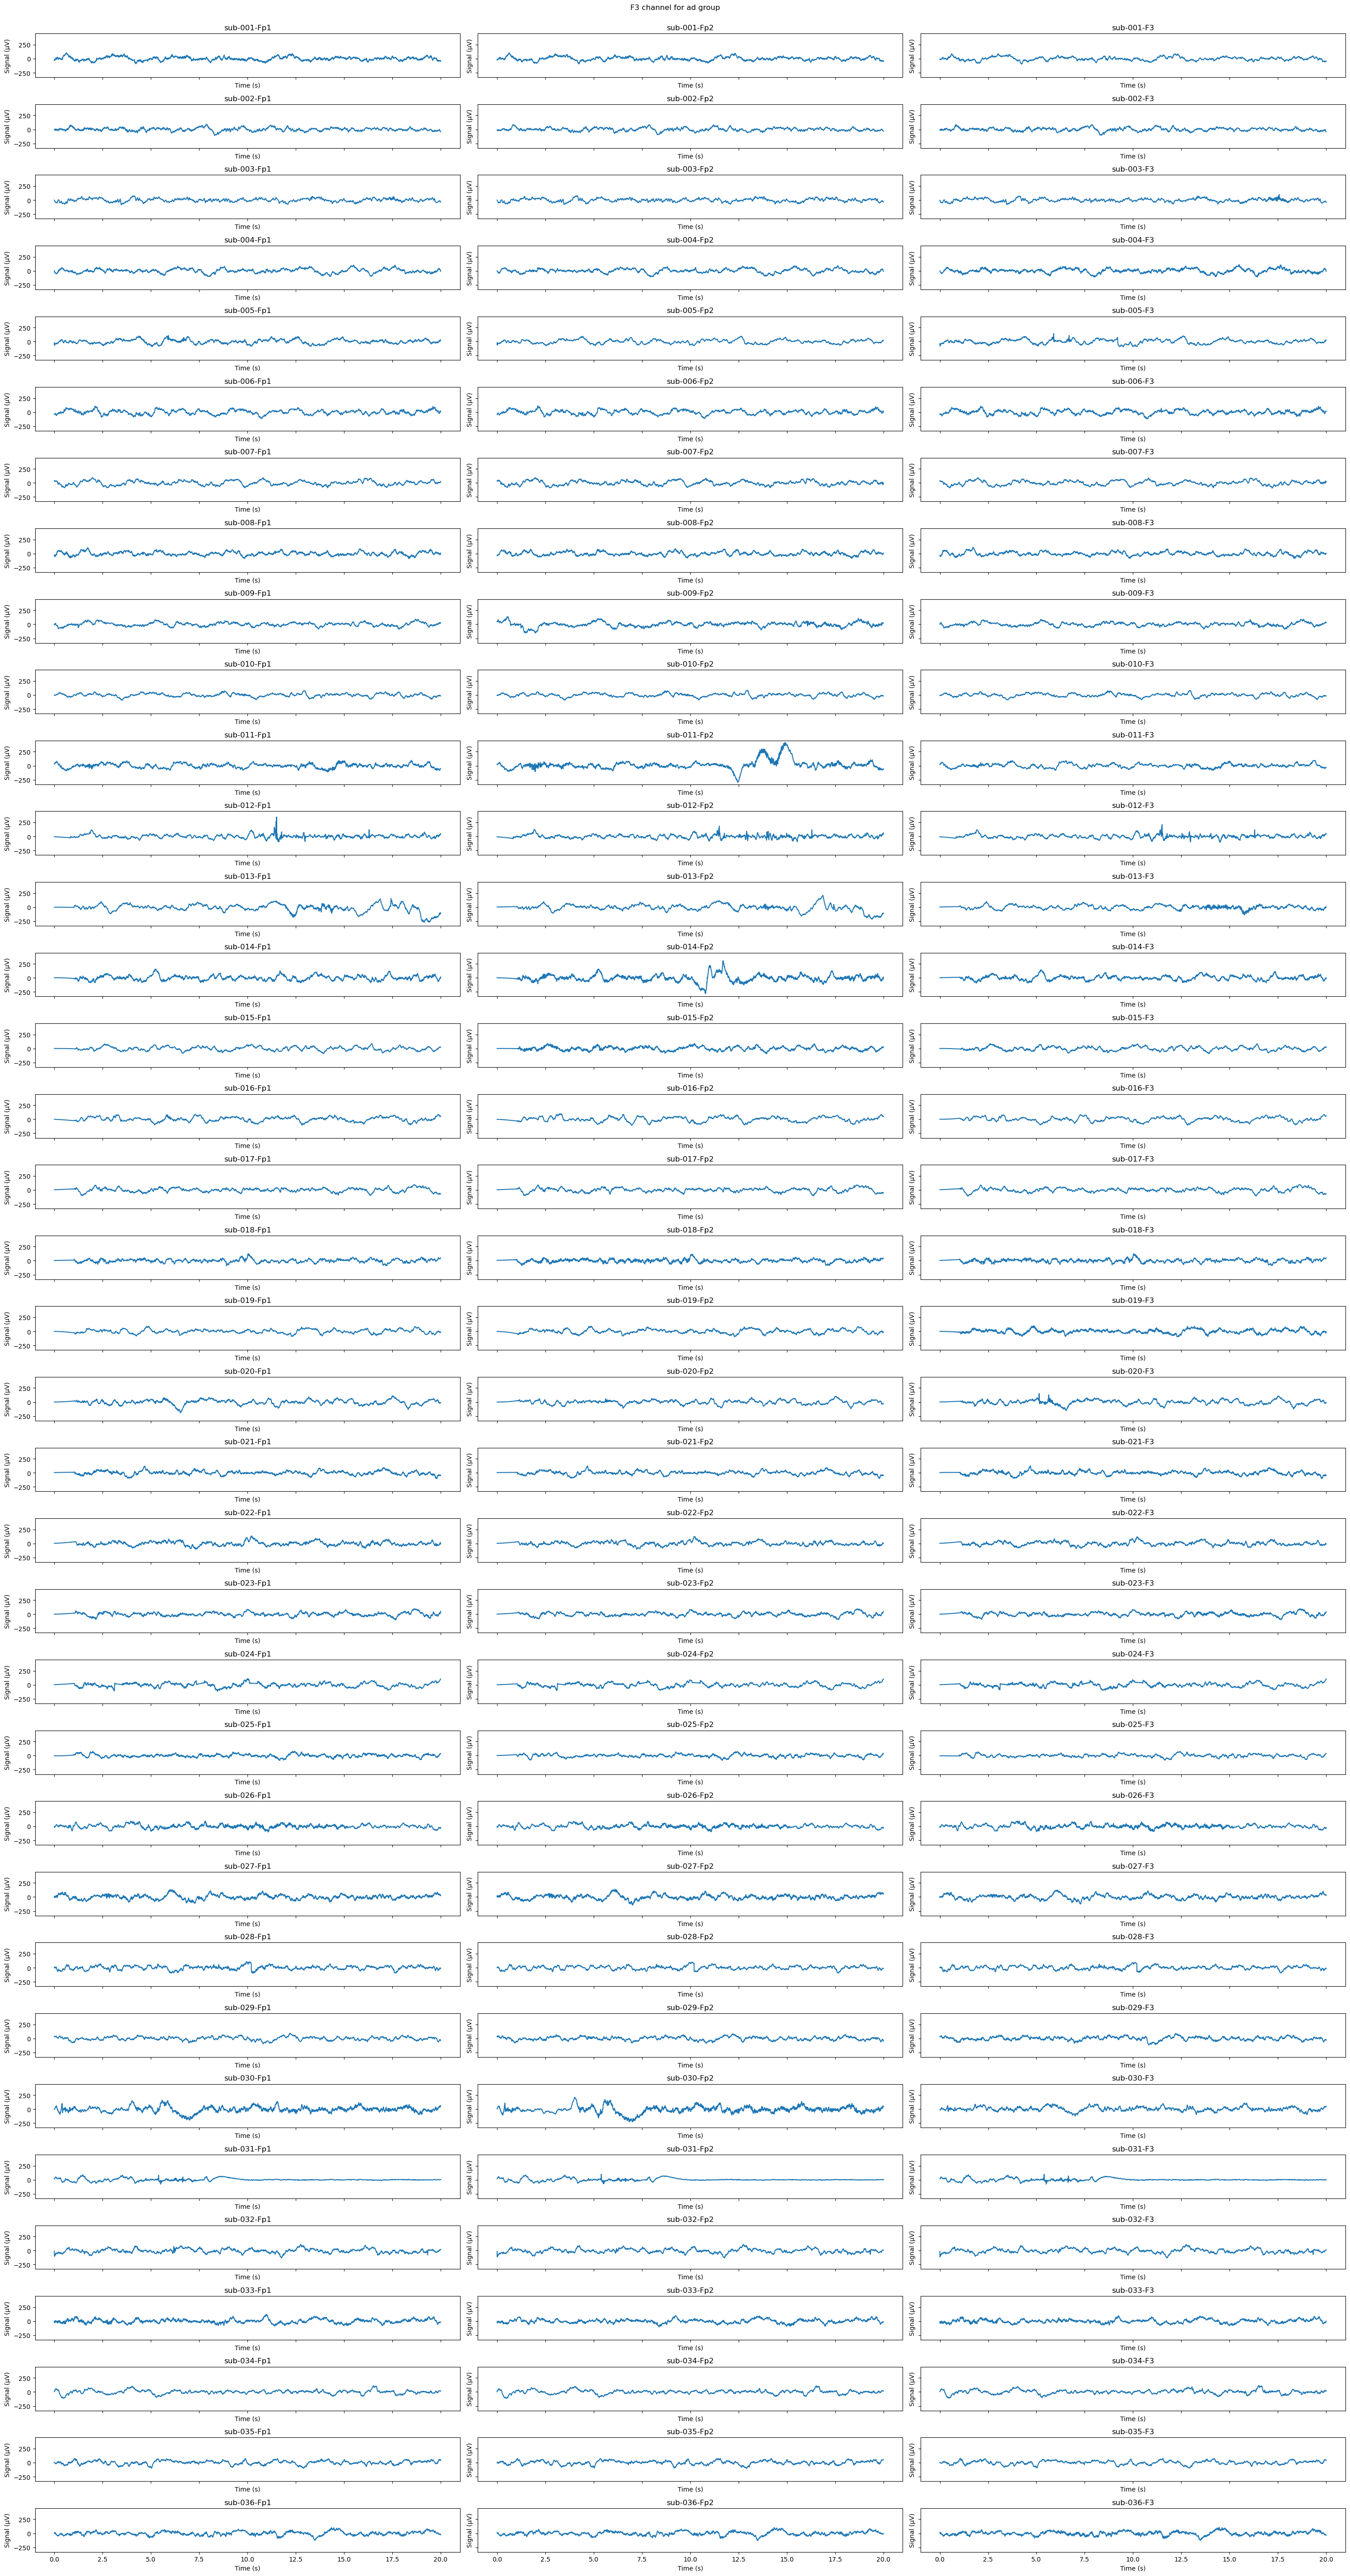

In [6]:
vis_class_channel(ad_df, 'ad')


In [7]:
to_remove_ad = ['sub-011', 'sub-012', 'sub-014']
ad_df_filtered = ad_df[['time'] + list(filter(lambda x: re.findall(r'sub-\d{3}', x)[0] not in to_remove_ad, ad_df.columns[1:]))]
ad_df_filtered.to_csv(os.path.join('EEG_human', 'ad_eeg_20.csv'), index=True)




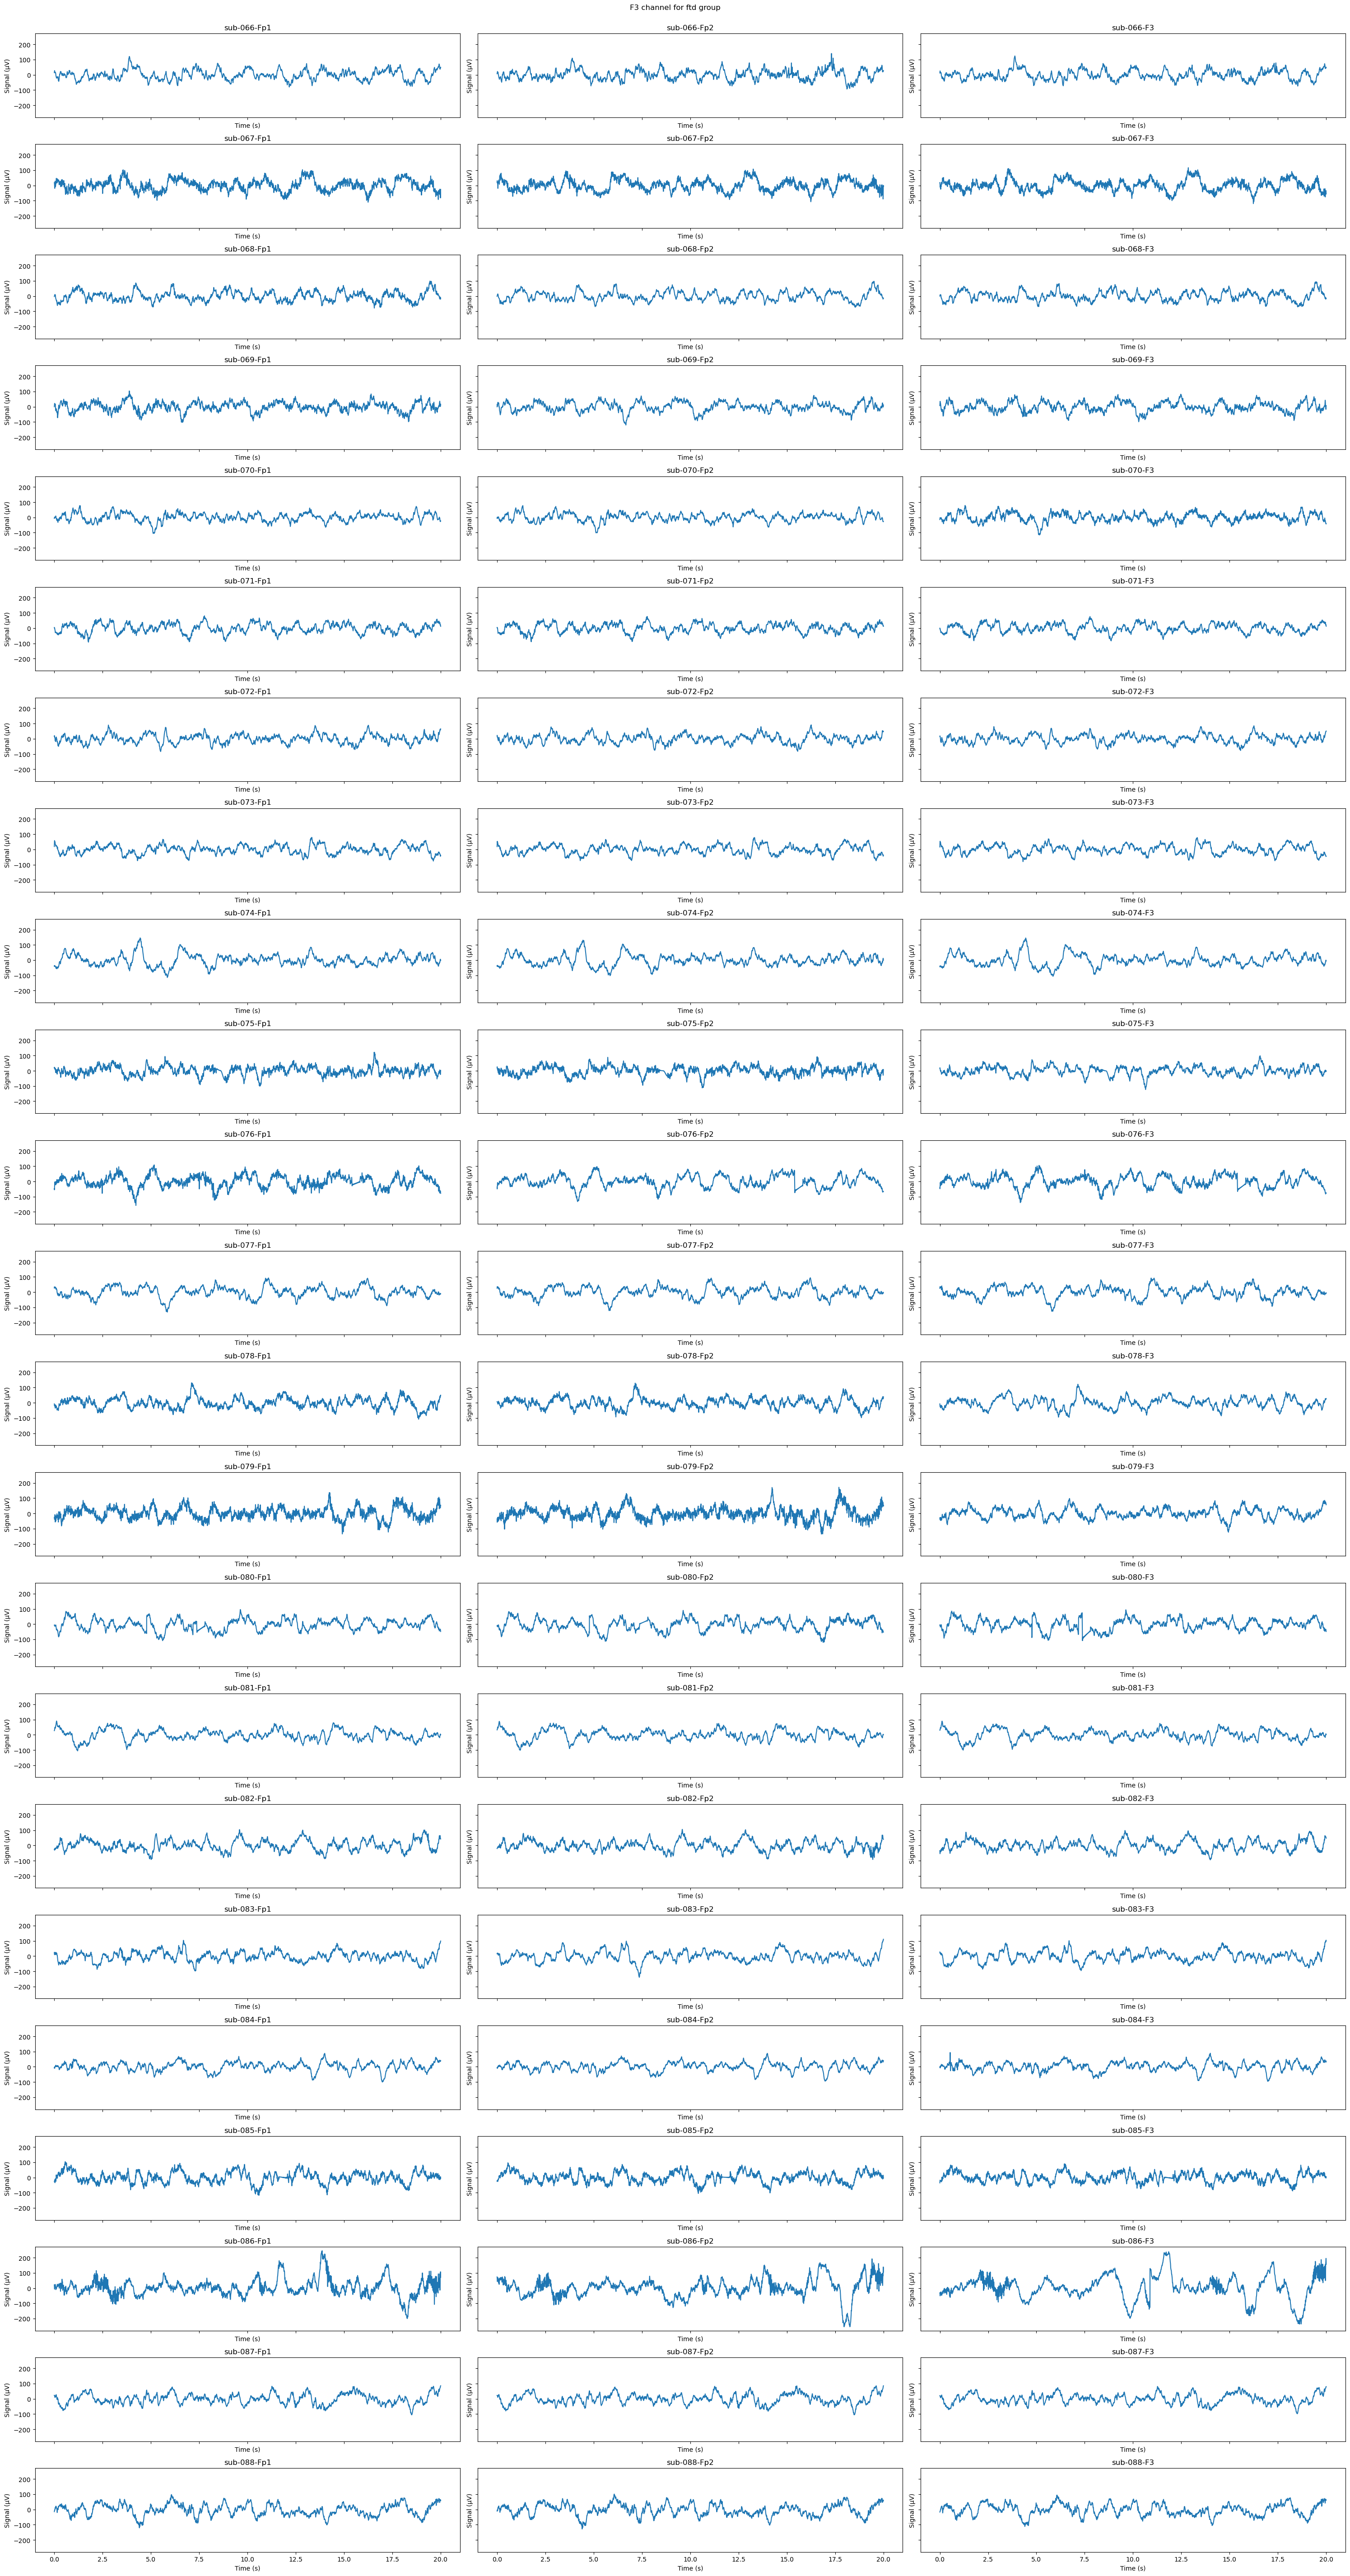

In [8]:
vis_class_channel(ftd_df, 'ftd')


In [9]:
to_remove_ftd = ['sub-086']
ftd_df_filtered = ftd_df[['time'] + list(filter(lambda x: re.findall(r'sub-\d{3}', x)[0] not in to_remove_ftd, ftd_df.columns[1:]))]
ftd_df_filtered.to_csv(os.path.join('EEG_human', 'ftd_eeg_20.csv'), index=True)


